In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

2024-11-13 00:30:38.256323: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
path = R'/Users/shaquillelee/Documents/Specialization /Datasets'

In [9]:
weather_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_cleaned.csv'), index_col = 0)
pleasant_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'pleasant_cleaned.csv'), index_col = 0)

In [10]:
weather_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressue,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.01

In [11]:
weather_df.shape

(22950, 135)

In [12]:
pleasant_df.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
pleasant_df.shape

(22950, 15)

## 2. Data Wrangling
- Reduce data to one station only. For this script: basel.

In [15]:
# Find columns in weather_df that contain 'BASEL' in their name
basel_list = [col for col in weather_df.columns if 'BASEL' in col]
basel_list

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [17]:
# Create a dataframe with those columns
df_basel= weather_df[basel_list]
df_basel

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0
...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1


In [18]:
# Reduce answers dataset to Basel's answers only
answers_basel = pleasant_df['BASEL_pleasant_weather']
answers_basel

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

In [21]:
df_basel.shape

(22950, 9)

In [20]:
answers_basel.shape

(22950,)

## 3. Reshaping for Modeling

In [22]:
X2 = df_basel

In [23]:
y2 = answers_basel

In [24]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [25]:
X.shape

(22950, 9)

In [26]:
y.shape

(22950,)

## 4. Data Split 

In [27]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [29]:
X_train

array([[ 2.    ,  0.69  ,  1.0131, ..., 20.4   , 13.6   , 26.9   ],
       [ 8.    ,  0.82  ,  1.0166, ..., -1.8   , -3.2   , -0.5   ],
       [ 7.    ,  0.84  ,  1.0097, ..., -1.8   , -6.    ,  0.7   ],
       ...,
       [ 6.    ,  0.82  ,  1.018 , ...,  6.3   ,  3.5   , 11.9   ],
       [ 7.    ,  0.7   ,  1.018 , ..., 10.1   ,  8.2   , 15.7   ],
       [ 6.    ,  0.68  ,  1.0195, ..., 11.6   ,  5.1   , 15.8   ]])

In [30]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
X_test

array([[ 6.    ,  0.68  ,  1.0168, ..., 15.1   , 10.8   , 19.5   ],
       [ 8.    ,  0.75  ,  1.013 , ...,  1.2   , -0.2   ,  2.6   ],
       [ 6.    ,  0.73  ,  1.0122, ..., 20.2   , 15.8   , 25.    ],
       ...,
       [ 6.    ,  0.74  ,  1.018 , ...,  8.8   ,  5.9   , 17.6   ],
       [ 6.    ,  0.65  ,  1.0243, ...,  9.3   ,  3.6   , 13.2   ],
       [ 7.    ,  0.83  ,  1.0202, ..., 17.4   , 11.1   , 21.9   ]])

In [34]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

## 5. Hyperparameter Optimization

### Grid Search

In [35]:
# Create a RF classifier

clf = RandomForestClassifier()

In [36]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [37]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.961 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.955 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.954 total time=   1.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.902 total time=   0.1s
[CV 2/3] END m

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.957 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.966 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.974 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.960 total time=   1.1s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_sample

Search took 2.171841084957123 minutes


In [38]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


### Random Search

In [39]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [40]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [41]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.949 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.954 total time=   1.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.971 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.963 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.957 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.973 total time=   0.1s
[CV 2/3] E

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.927 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.932 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.934 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.964 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.964 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.948 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.967 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.959 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_s

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.961 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.954 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.951 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.909 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.957 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.962 total time=   1.2s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.949 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.943 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.953 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.963 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.975 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.938 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.947 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.918 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.953 total time=   1.3s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples

Search took 3.3250998814900714 minutes


In [42]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 90, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 410}
Best RANDOM search score is: 1.0


In [43]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 90, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 410}
Best RANDOM search score is: 1.0


## 6. Running Random Forest with Optimized Search Parameters


In [45]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 410, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, max_features=5, min_samples_leaf=3,
                       n_estimators=410)

In [46]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


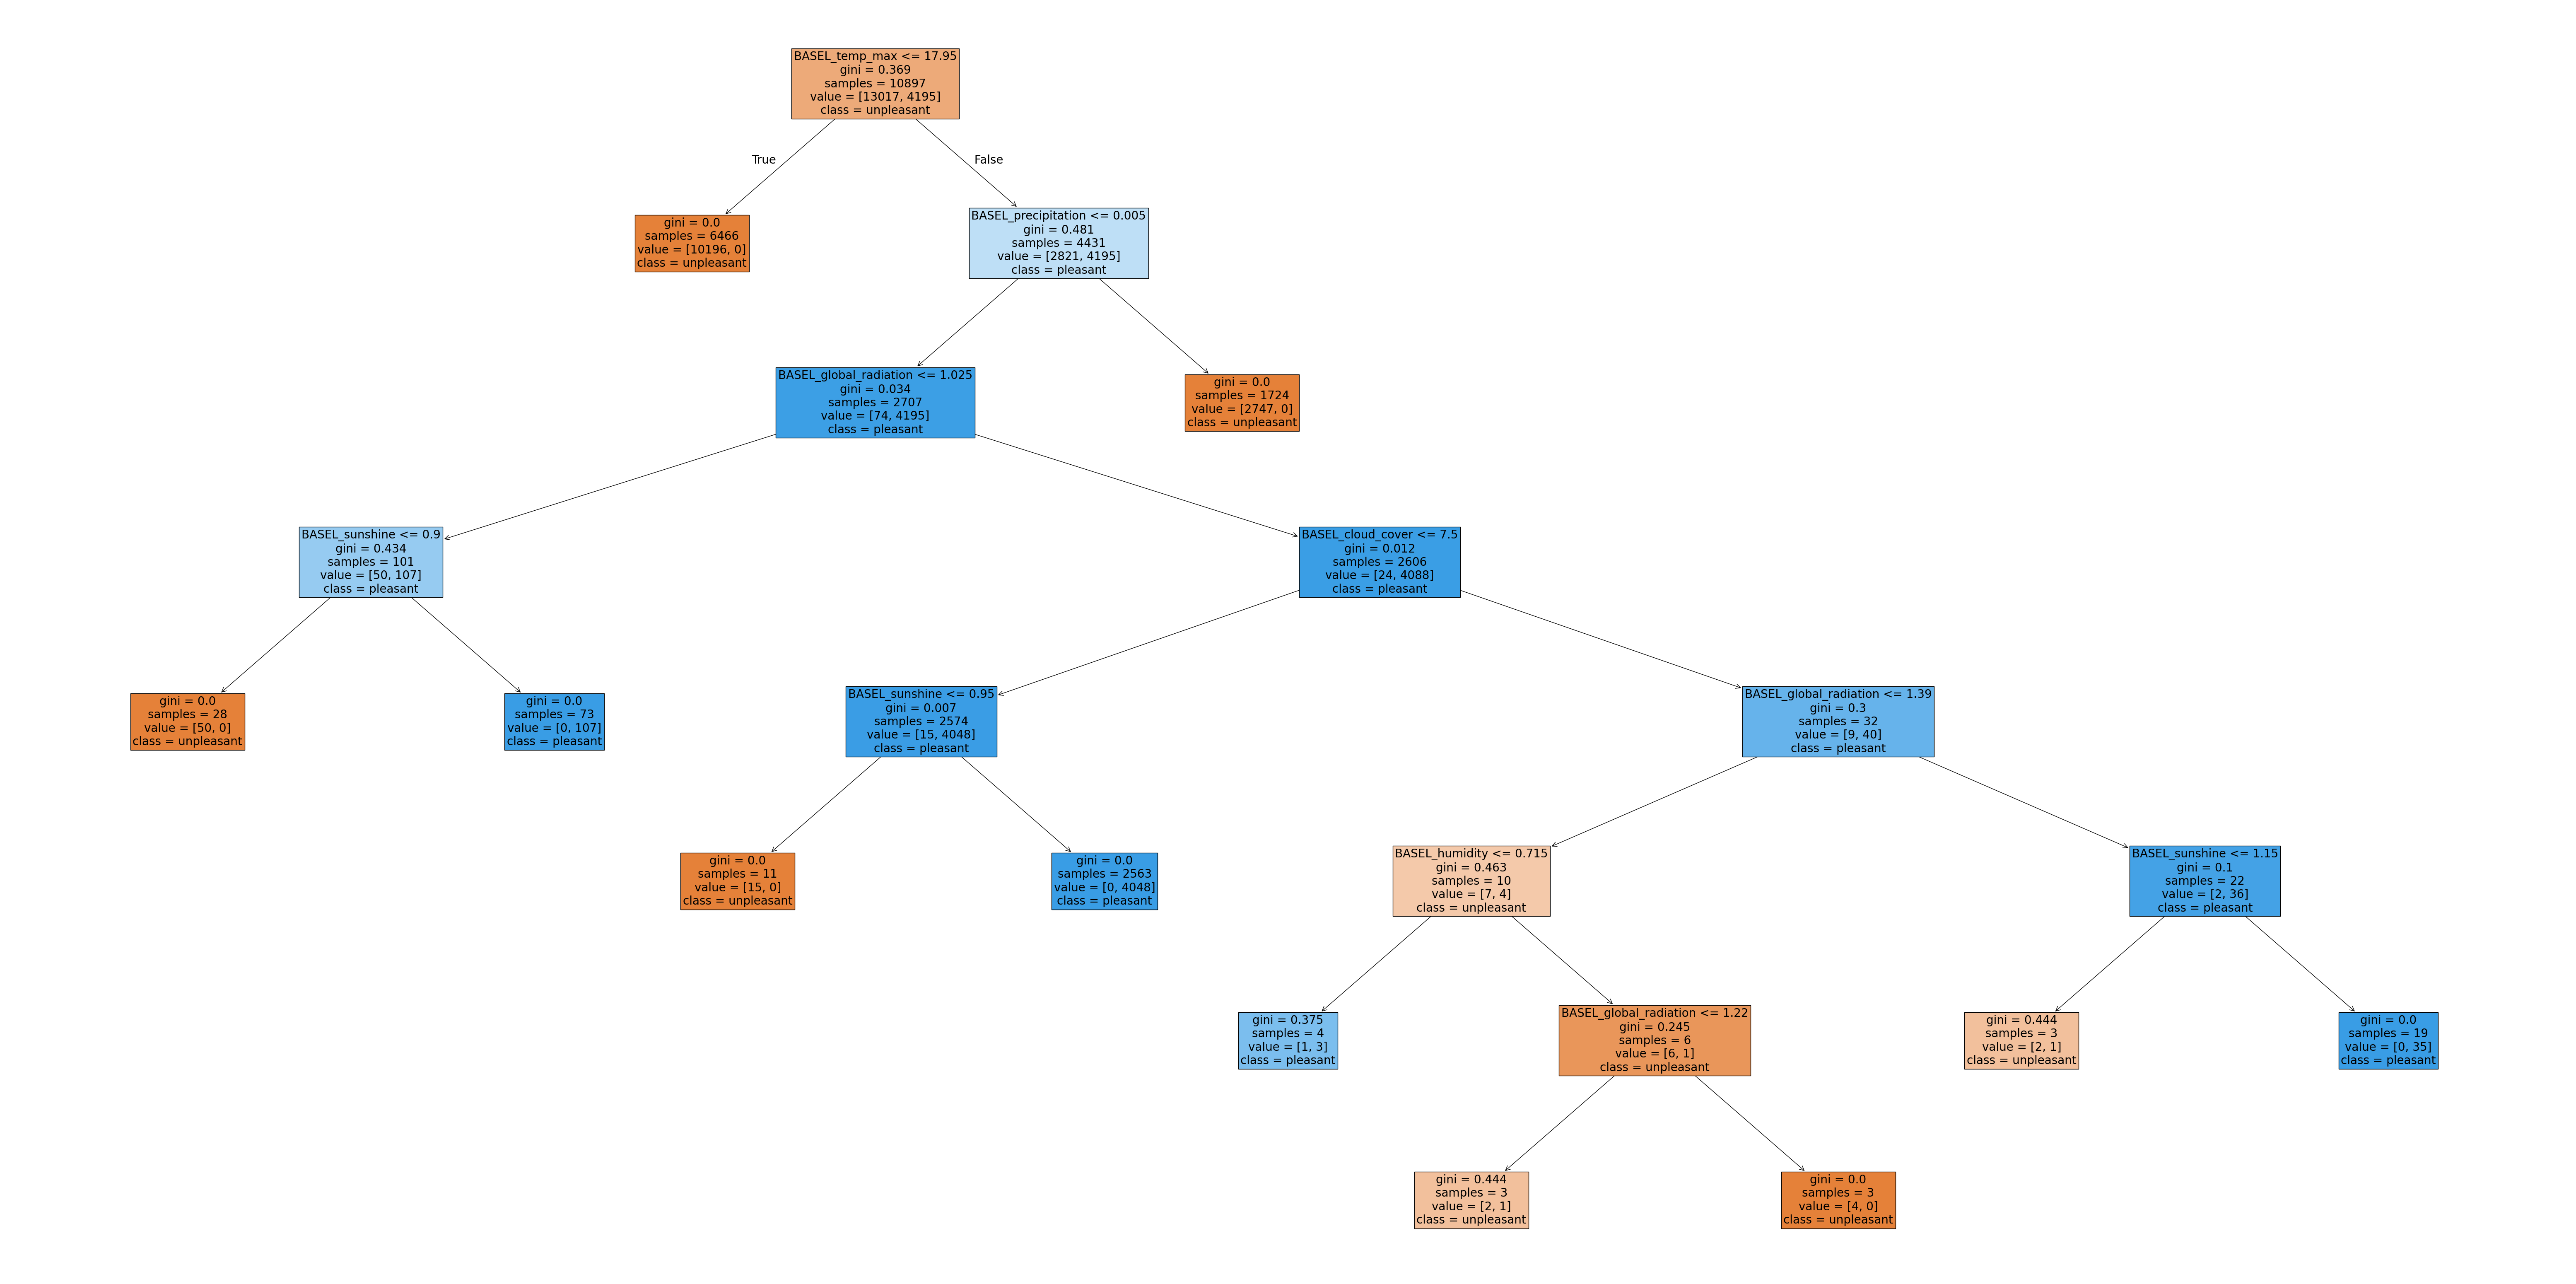

[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.6s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.9s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.4s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1,

[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   2.5s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.7s
[CV 1/3] END max_depth=None, max_features=5, min_samples_l

[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.2s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.9s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.8s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.5s
[CV 3/3] END max_depth=None, max_features=5, min_s

[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.4s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.4s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.5s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min

[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.4s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.3s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.7s
[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.7s
[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.7s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, m

[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.9s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.999 total time=   1.9s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   1.8s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.3s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.4s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   3.0s
[CV 3/3] END max_depth=None, max_features=5, min

[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.999 total time=   0.9s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=3, min_samples

[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.8s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.6s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.3s
[CV 2/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.2s
[CV 3/3] END max_depth=None, max_features=7, min_sam

In [48]:
#Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_basel.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [49]:
fig.savefig(os.path.join(path, 'Visualizations', 'optimized_random_forest_Basel.png'),bbox_inches='tight')

## 7. Uncovering Feature Importances

In [50]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.01488684, 0.00232217, 0.00266071, 0.09741509, 0.40477426,
       0.09978559, 0.04119773, 0.0045051 , 0.33245251])

In [51]:
# Create a list of weather features

wx_list = [feature.replace('BASEL_', '') for feature in basel_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [55]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.014887
humidity            0.002322
pressure            0.002661
global_radiation    0.097415
precipitation       0.404774
sunshine            0.099786
temp_mean           0.041198
temp_min            0.004505
temp_max            0.332453
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


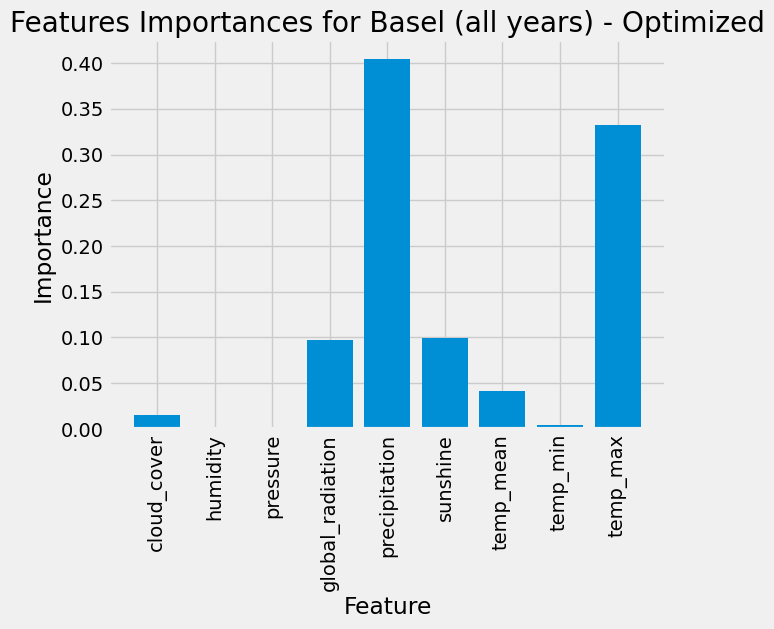

In [56]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Basel (all years) - Optimized');

plt.savefig(os.path.join(path, 'Visualizations', 'Basel_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()